In [6]:
import pickle
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

method = "LN_COBYLA (NLopt)"
problem = "maxcut"
p = 5
n = 32
seed_pool = list(range(1000))
batch_size = 40 if p > 3 else 100
batch_pool = list(range(0, 10))
d = 0.1

data = []
for batch in batch_pool:
    try:
        datafile = pickle.load(
            open(
                f"data/{problem}/hardness/p{p}-q{n}-s{batch * batch_size}-{(batch + 1) * batch_size - 1}-d{d}.pckl",
                "rb",
            ),
        )
        data.append(datafile["data"])
    except:
        pass
data = np.concatenate(data)

# seeds = np.argsort(np.linalg.norm(np.abs(data), 2, axis=1))
seeds = np.argsort(np.linalg.norm(np.abs((data[:,1:] - data[:,0:1]) / d), 2, axis=1))[::-1]
seeds[np.where(seeds >= 120)] += 40


array([241, 218, 162, 341, 246, 284, 134,  66,   5, 184,  22, 256, 265,
        42, 125, 195, 191, 299, 205, 113, 248, 206,  61, 290, 151, 130,
       147,  36,  73,   4, 232, 355,  70, 301, 304, 190, 343, 203,  40,
       335, 124,  19, 172, 255, 308, 156, 197, 239, 185, 137, 332, 186,
       220,  81, 141, 273,  82, 236, 188,  63, 171, 193,  92, 222, 251,
       177, 271,  45, 129,  95, 217,  44, 215,  90, 263, 135, 285, 211,
       216, 269, 127, 228, 342, 264,  88, 143,  68,  10,  33, 286, 160,
       183, 209, 214,  14, 126, 123, 176, 148, 249, 110, 219, 357, 181,
       159, 212, 345, 317, 204, 261, 262, 121, 253, 131, 108, 201, 120,
       231, 152, 252, 168, 149, 165,  38, 331, 307, 175, 318,  11,  49,
       243,  25, 302, 178, 166, 105, 329, 114,   0, 276, 320, 240,   3,
       101, 289,  30, 128, 278, 119,  65,  78, 293,  12, 144, 282,  99,
       259, 260, 257, 266, 300, 104, 202, 258,  84, 313,  59, 122,  29,
       161,  55,  98, 226, 115, 154, 354, 277,   7, 163,  34, 19

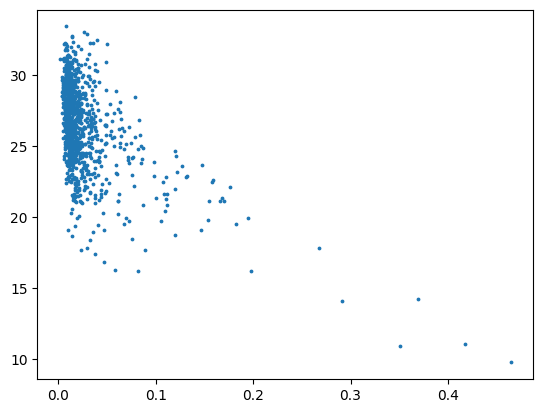

In [17]:

datafile = pickle.load(
    open(
        f"data/{problem}/configs/max_ar/LN_COBYLA (NLopt)-p{p}-q{n}-s0-999.pckl",
        "rb",
    ),
)
max_ar = datafile["result"][:len(seed_pool)]
initial_ar = np.array(datafile["initial_ar"])[:len(seed_pool)]
# plt.plot(seed_pool, (max_ar - initial_ar)[seeds], label="max_ar - initial_ar")
plt.scatter(max_ar - initial_ar, np.linalg.norm(np.abs(data), 2, axis=1), s=3)
# plt.scatter(max_ar - initial_ar, np.linalg.norm(np.abs((data[:,1:] - data[:,0:1]) / d), 2, axis=1), s=3)


In [15]:
# %matplotlib widget
import pickle
import numpy as np
import warnings

warnings.filterwarnings('ignore')

method = "LN_COBYLA (NLopt)"
problem = "maxcut"
p = 5
n = 6
seed_pool = list(range(1000))

datafile = pickle.load(
    open(
        f"data/{problem}/configs/max_ar/LN_COBYLA (NLopt)-p{p}-q{n}-s0-999.pckl",
        "rb",
    ),
)
max_ar = datafile["result"][:len(seed_pool)]
initial_ar = np.array(datafile["initial_ar"])[:len(seed_pool)]


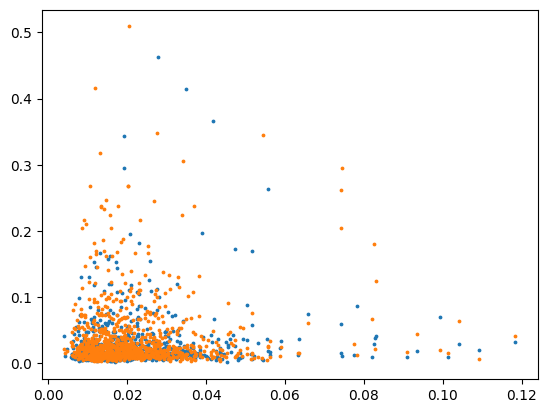

In [16]:
import matplotlib.pyplot as plt

for prob in [problem, problem + "-hardness"]:
    datafile = pickle.load(
        open(
            f"data/{prob}/configs/max_ar/LN_COBYLA (NLopt)-p{p}-q{n*2}-s0-999.pckl",
            "rb",
        ),
    )
    max_ar_alt = datafile["result"][:len(seed_pool)]
    initial_ar_alt = np.array(datafile["initial_ar"])[:len(seed_pool)]

    plt.scatter(max_ar - initial_ar, max_ar_alt - initial_ar_alt, 3)


In [9]:
from evaluate_energy import get_evaluate_energy, load_problem
import matplotlib.pyplot as plt
from scipy.spatial import distance
from qokit.parameter_utils import get_fixed_gamma_beta

delta = 0.1

datafile = pickle.load(
    open(
        f"data/{problem}-unweighted/configs/max_ar/{method}-p{p}-q{n}-s{seed_pool[0]}-{seed_pool[-1]}.pckl",
        "rb",
    ),
)
max_ar_unweighted = datafile["result"][:len(seed_pool)]
initial_ar_unweighted = np.array(datafile["initial_ar"])[:len(seed_pool)]

data = [[], []]
for seed in seed_pool:
    for j, prob in enumerate([problem, f"{problem}-unweighted"]):
        instance, precomputed_energies = load_problem(prob, n, seed)
        eval_func = get_evaluate_energy(
            instance,
            precomputed_energies,
            p,
            objective="expectation",
            simulator="c",
        )
        gamma, beta = get_fixed_gamma_beta(3, p)
        beta = [b * 4 for b in beta]
        initial_value = eval_func(gamma + beta)
        gamma_values, beta_values = [], []
        for i in range(p):
            gamma[i] += delta
            gamma_values.append(eval_func(gamma + beta))
            gamma[i] -= delta
            beta[i] += delta
            beta_values.append(eval_func(gamma + beta))
            beta[i] -= delta
        data[j].append((np.array(gamma_values + beta_values) - initial_value) / delta)
        print(seed, data[j][-1], (np.array(gamma_values) - initial_value), (np.array(beta_values) - initial_value), (max_ar - initial_ar)[seed], max_ar[seed], initial_ar[seed])
    # data.append(distance.minkowski([instance.edges[e]['weight'] for e in instance.edges], np.ones(instance.number_of_edges())))


0 [-0.22324394 -0.29180857] [-2.23243943e-05] [-2.91808572e-05] 0.0017933730345239818 0.7831637430363972 0.7813703700018733
0 [-0.35406047 -0.49987008] [-3.5406047e-05] [-4.99870084e-05] 0.0017933730345239818 0.7831637430363972 0.7813703700018733
1 [ 0.29728287 -0.09549275] [2.97282868e-05] [-9.54927499e-06] 0.0018856440733773239 0.7997895225894169 0.7979038785160396
1 [-0.47185281 -0.66654946] [-4.71852809e-05] [-6.66549457e-05] 0.0018856440733773239 0.7997895225894169 0.7979038785160396
2 [-1.35324177 -0.00301366] [-0.00013532] [-3.01366146e-07] 0.019656466215503876 0.7494992879608406 0.7298428217453368
2 [-0.11847579 -0.16651134] [-1.18475791e-05] [-1.66511336e-05] 0.019656466215503876 0.7494992879608406 0.7298428217453368
3 [ 0.9338003  -0.00118109] [9.33800302e-05] [-1.18109416e-07] 0.012581020505858187 0.875929174023414 0.8633481535175558
3 [-0.11847579 -0.16651134] [-1.18475791e-05] [-1.66511336e-05] 0.012581020505858187 0.875929174023414 0.8633481535175558
4 [-2.29843409e-01  1

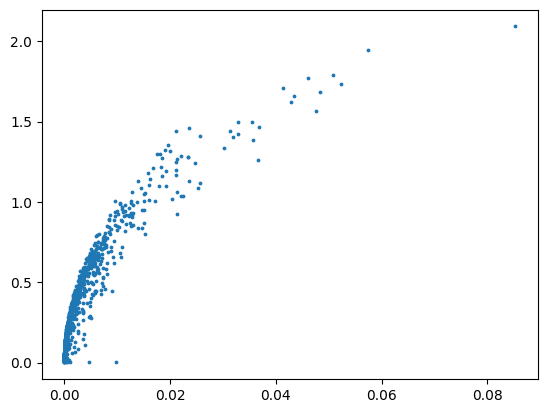

In [13]:
plt.scatter((max_ar - initial_ar), np.abs(data[0])[:,0], 3)


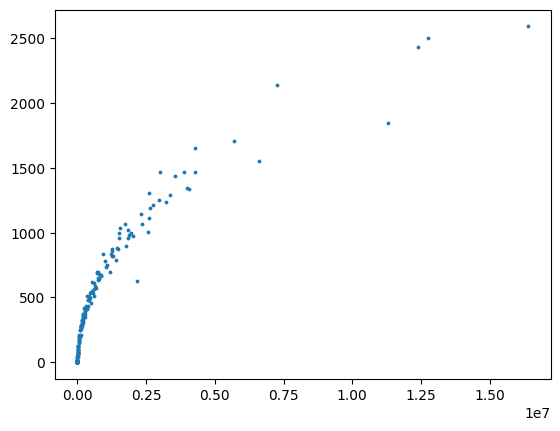

In [11]:
plt.scatter((max_ar - initial_ar) / (max_ar_unweighted - initial_ar_unweighted), np.linalg.norm(np.abs(data[0])[:,:p] / np.abs(data[1])[:,:p], axis=1), 3)


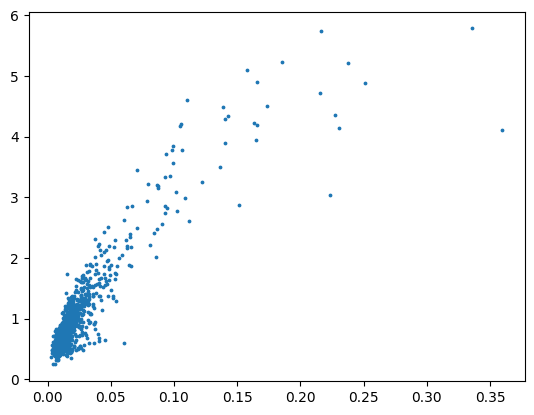

In [76]:
plt.scatter((max_ar - initial_ar), np.linalg.norm(np.abs(data[0])[:,:p], 2, axis=1), 3)


(2, 1000)


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f92333884f0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9233367640>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9233344be0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9233467d30>}

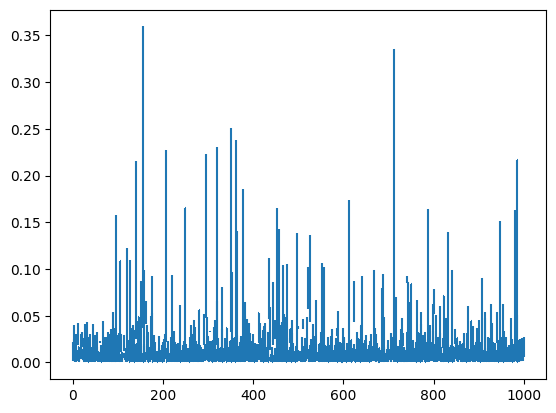

In [7]:
# %matplotlib widget
import pickle
import numpy as np
import matplotlib.pyplot as plt

method = "LN_COBYLA (NLopt)"
problem = "maxcut"
depth_pool = list(range(1, 6))
depth_pool = [1, 5]
n = 10
seed_pool = list(range(1000))

max_ar, initial_ar = [], []
for p in depth_pool:
    data = pickle.load(
        open(
            f"data/{problem}/configs/max_ar/LN_COBYLA (NLopt)-p{p}-q{n}-s0-999.pckl",
            "rb",
        ),
    )
    max_ar.append(data["result"][:len(seed_pool)])
    data = pickle.load(
        open(
            f"data/{problem}/configs/budget/{method}-p{p}-q{n}-s{seed_pool[0]}-{seed_pool[-1]}.pckl",
            "rb",
        ),
    )
    initial_ar.append(np.array(data["initial_ar"]))

print(np.array(max_ar).shape)
plt.figure()
plt.violinplot(np.array(max_ar) - np.array(initial_ar))
